In [9]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2019-10-08 18:41:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.163.112, 2404:6800:4007:80d::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.163.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  3.30MB/s    in 43s     

2019-10-08 18:41:44 (3.29 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [6]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2019-10-08 18:40:28--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.163.112, 2404:6800:4007:80d::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.163.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  3.67MB/s    in 3.0s    

2019-10-08 18:40:33 (3.67 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [10]:
import os 
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

Define each of these Directories:

In [11]:
# Directory with our training horse picture
train_horse_dir = os.path.join('/tmp/horse-or-human/horses') 
# Directory with our training human picture
train_human_dir = os.path.join('/tmp/horse-or-human/humans') 

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/validation-horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/validation-humans')

Let's see what the filenames look like in the horse and human training directory

In [12]:
train_horse_names = os.listdir(train_horse_dir)

print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)

print(train_human_names[:10])

['horse50-6.png', 'horse41-9.png', 'horse07-1.png', 'horse45-4.png', 'horse20-5.png', 'horse26-3.png', 'horse10-4.png', 'horse13-7.png', 'horse46-4.png', 'horse19-6.png']
['human16-10.png', 'human08-27.png', 'human07-21.png', 'human06-18.png', 'human02-12.png', 'human10-23.png', 'human12-20.png', 'human09-14.png', 'human03-18.png', 'human01-29.png']


Let's find out the total number of horse and human images in the directory

In [13]:
print('Total training horse images: ',len(train_horse_names))
print('Total training human images: ',len(train_human_names))

Total training horse images:  500
Total training human images:  527


In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 horse and 8 human pictures. You can rerun the cell to see a fresh batch each time:

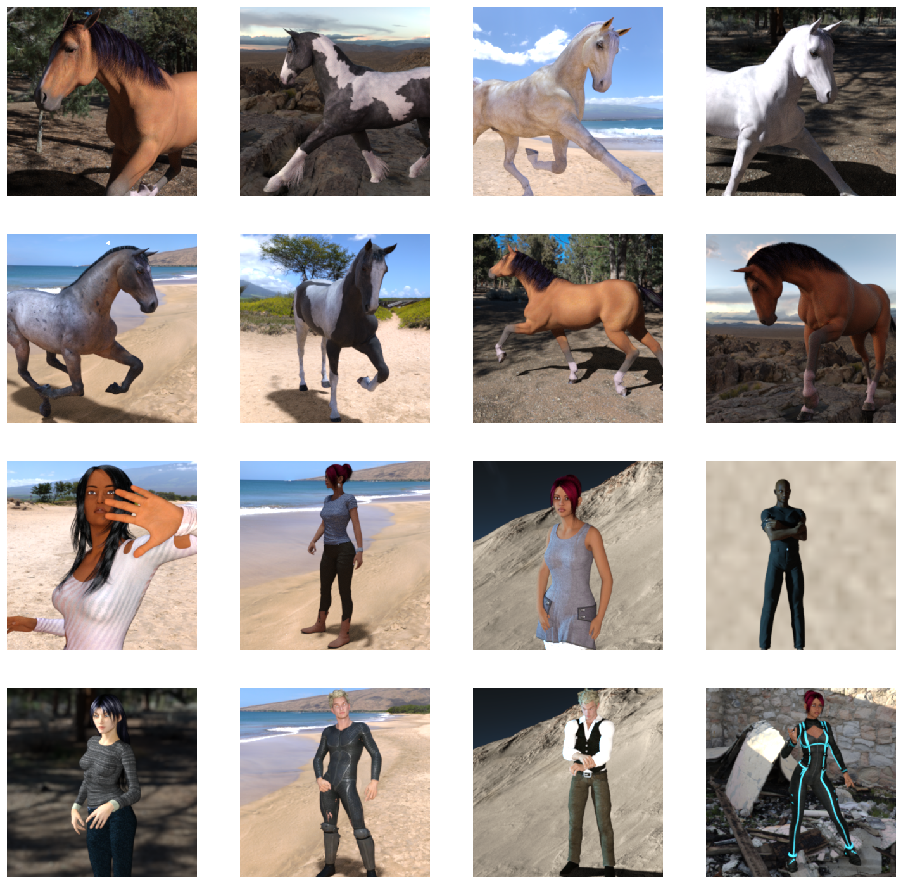

In [15]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)  
                  for fname in train_horse_names[pic_index-8:pic_index]]

next_human_pix = [os.path.join(train_human_dir ,fname)
                  for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    
    img=mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

In [16]:
!pip install tensorflow==2.0.0-alpha0
import tensorflow as tf
print(tf.__version__)

2.0.0-alpha0


In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

The model.summary() method call prints a summary of the NN

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [13]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', 
              optimizer=RMSprop(lr=0.001), 
              metrics=['acc'])

### Data Preprocessing
Let's set up data generators that will read pictures in our source folders, convert them to float32 tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of images of size 300x300 and their labels (binary).

In Keras this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory). These generators can then be used with the Keras model methods that accept data generators as inputs: fit_generator, evaluate_generator, and predict_generator.

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory('/tmp/horse-or-human/',
                                                    target_size=(300,300), 
                                                    batch_size=128, class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [17]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 54s 7s/step - loss: 0.8856 - acc: 0.5740
Epoch 2/15
8/8 [==============================] - 45s 6s/step - loss: 0.8321 - acc: 0.6494
Epoch 3/15
8/8 [==============================] - 41s 5s/step - loss: 0.5059 - acc: 0.7875
Epoch 4/15
8/8 [==============================] - 37s 5s/step - loss: 0.8825 - acc: 0.7545
Epoch 5/15
8/8 [==============================] - 40s 5s/step - loss: 0.3770 - acc: 0.8621
Epoch 6/15
8/8 [==============================] - 44s 6s/step - loss: 0.2723 - acc: 0.9062
Epoch 7/15
8/8 [==============================] - 72s 9s/step - loss: 0.0862 - acc: 0.9655
Epoch 8/15
8/8 [==============================] - 52s 6s/step - loss: 0.3339 - acc: 0.8865
Epoch 9/15
8/8 [==============================] - 55s 7s/step - loss: 0.0795 - acc: 0.9689
Epoch 10/15
8/8 [==============================] - 41s 5s/step - loss: 0.3683 - acc: 0.9221
Epoch 11/15
8/8 [==============================] - 43s 5s/step - loss: 0.1182 - acc: 0.96

Testing data

In [24]:
import numpy as np
from tensorflow.keras.preprocessing import image
  # predicting images
path = '/content/' + fn
 #set the path 
img = image.load_img(path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print(fn + " is a human") 
else:
    print(fn + " is a horse")

NameError: name 'fn' is not defined

/home/prakashraj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


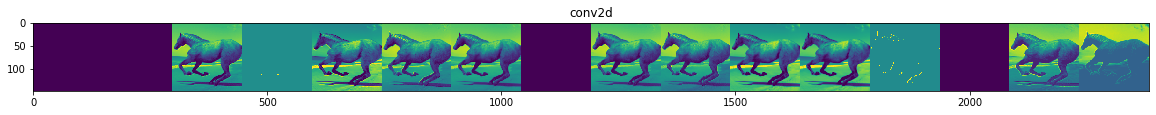

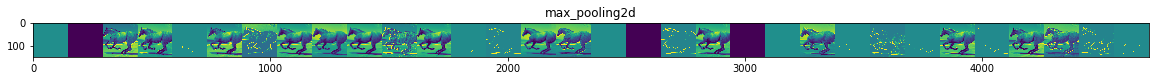

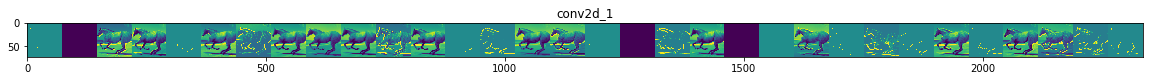

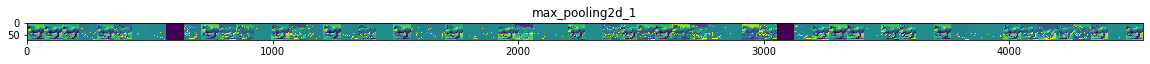

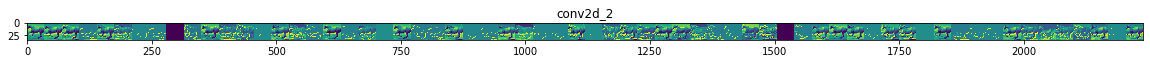

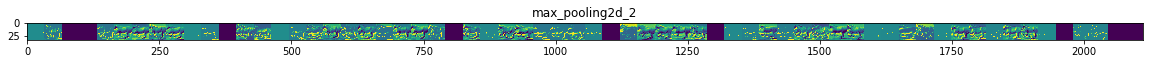

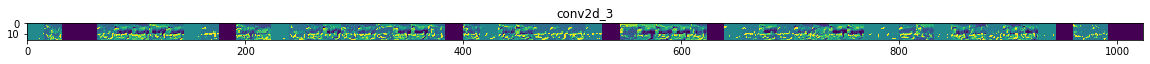

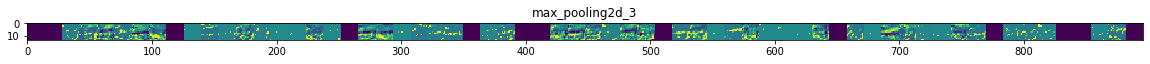

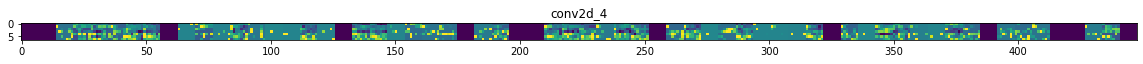

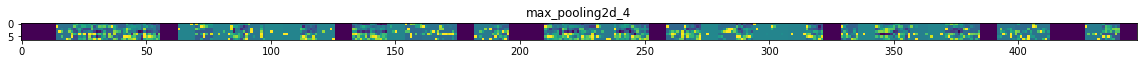

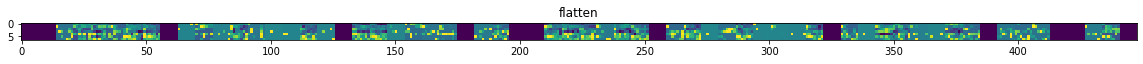

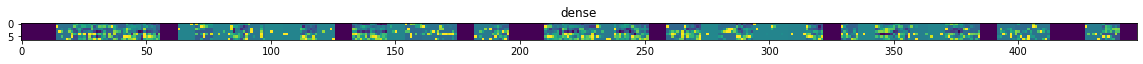

In [34]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map
        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
          # Postprocess the feature to make it visually palatable
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
          # We'll tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')